In [ ]:
import os
print(os.getcwd())

C:\Users\ACER\Desktop


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real,Categorical,Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('nasa.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
df.head(5)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Text(0.5, 1.0, 'correlation heatmap')

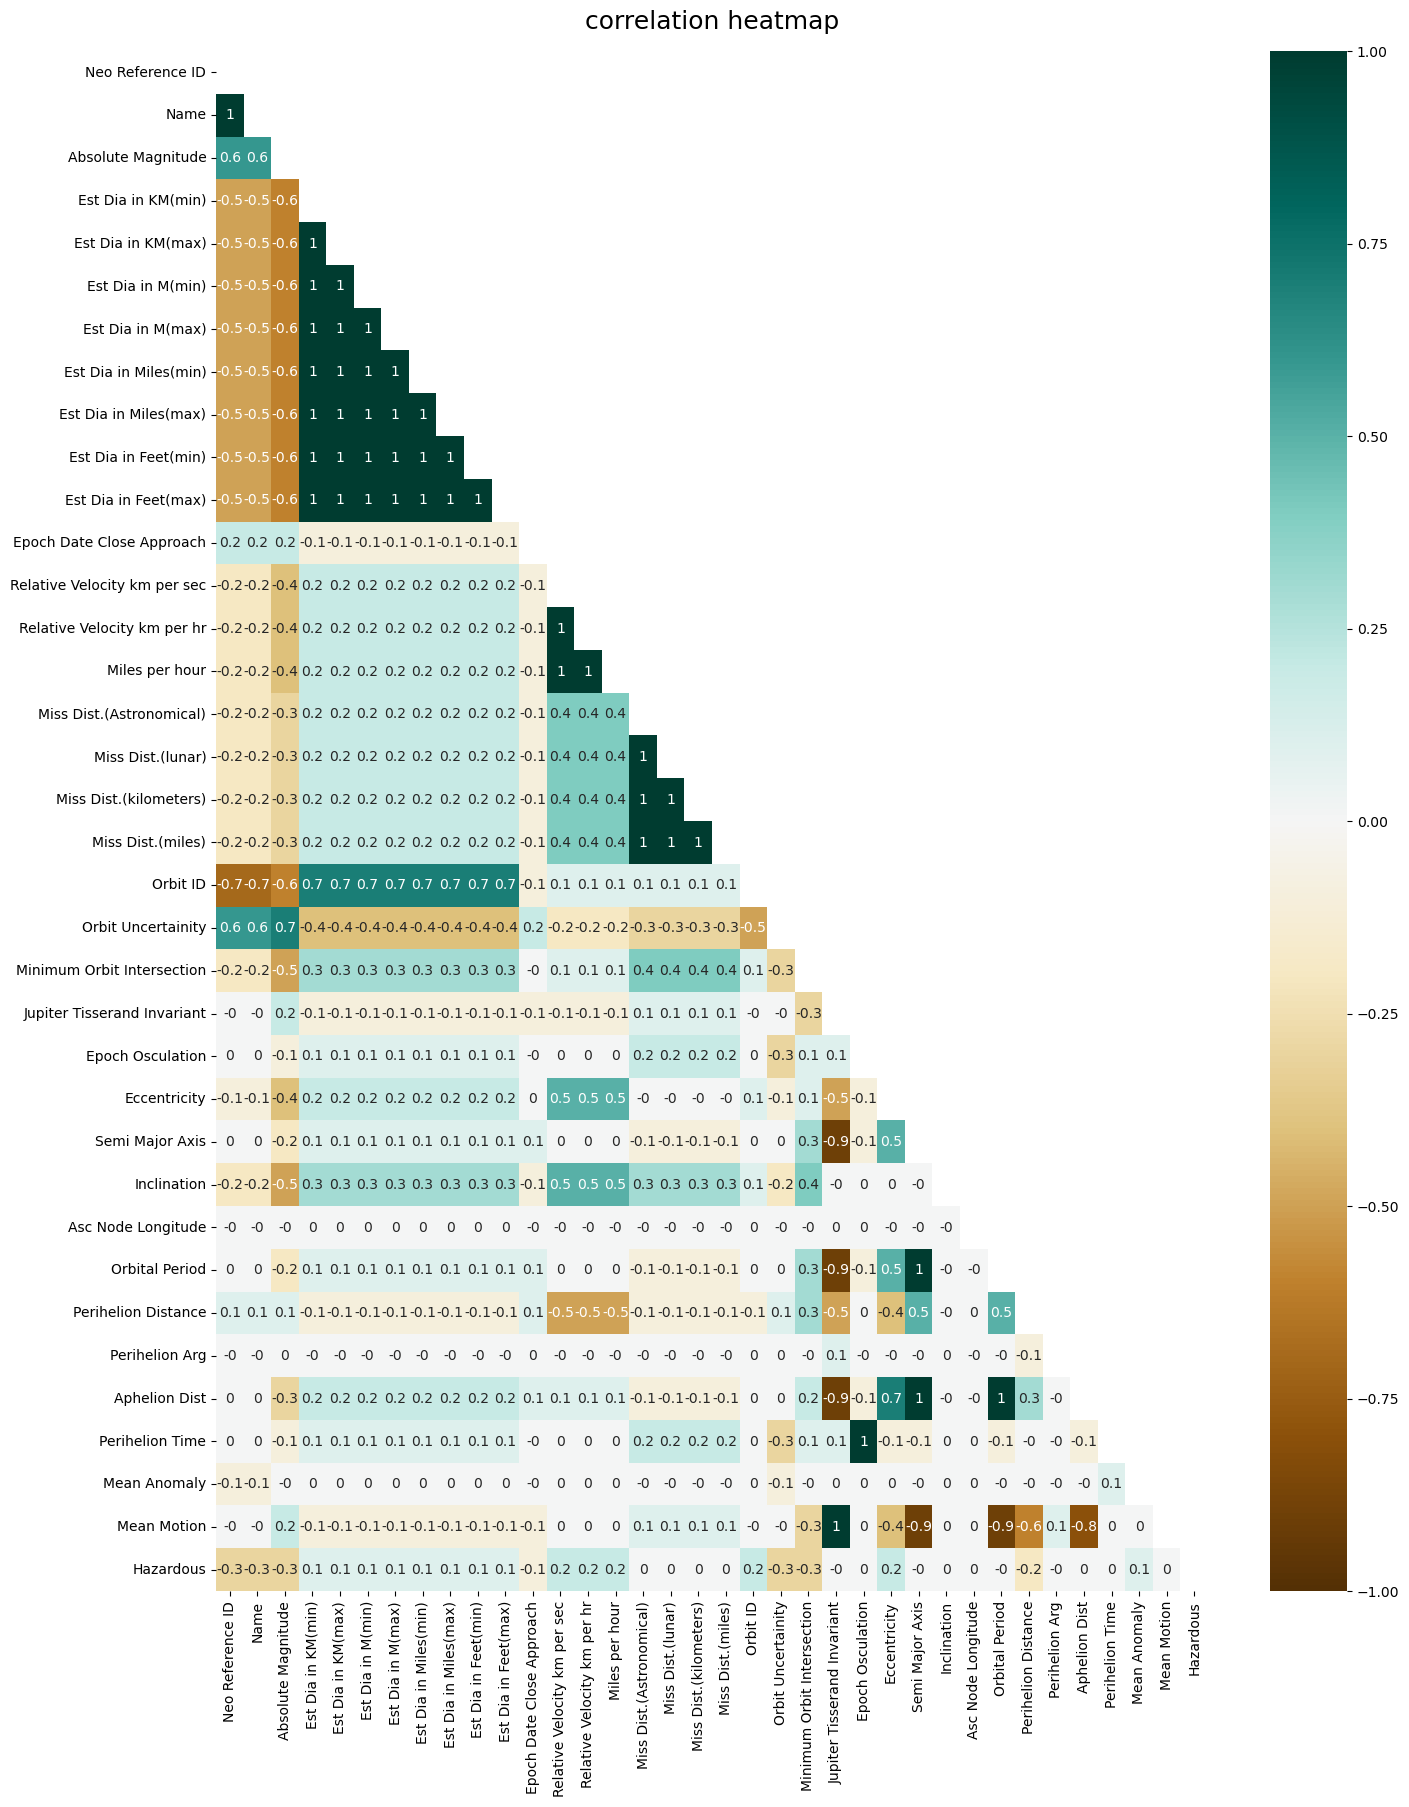

In [ ]:
plt.figure(figsize=(16,20))
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
heatmap=sns.heatmap(round(df.corr(),1),mask=mask,vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('correlation heatmap',fontdict={'fontsize':18},pad=16)

In [ ]:
df.isnull().any().any()

False

In [ ]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [ ]:
df.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(lunar)','Miss Dist.(kilometers)', 'Miss Dist.(miles)','Orbital Period',
       'Aphelion Dist', 'Perihelion Time',
       'Mean Motion'],axis=1,inplace=True)

In [ ]:
df.shape

(4687, 24)

In [ ]:
df.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Miss Dist.(Astronomical)        4673
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
Eccentricity                    3692
Semi Major Axis                 3692
Inclination                     3692
Asc Node Longitude              3692
Perihelion Distance             3692
Perihelion Arg                  3692
Mean Anomaly                    3692
Equinox                            1
Hazardous                          2
dtype: int64

In [ ]:
df.drop(['Neo Reference ID', 'Name','Orbiting Body','Equinox'],axis=1,inplace=True)

In [ ]:
df.drop(['Orbit Determination Date','Close Approach Date'],axis=1,inplace=True)

In [ ]:
df.shape

(4687, 18)

In [ ]:
X=df.drop(['Hazardous'],axis=1)
y=df['Hazardous']

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
scaler=RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
xgb=XGBClassifier(use_label_encoder=False)
xgb.fit(X_train_scaled,y_train)
xgb_pred=xgb.predict(X_test_scaled)
accuracy_score(y_test,xgb_pred)

0.994314143567875

In [ ]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1180
        True       0.99      0.98      0.98       227

    accuracy                           0.99      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       0.99      0.99      0.99      1407



In [ ]:
rfc_param={'n_estimators':[1,2,3,4,5,6,7,8,9,10],
           'learning_rate':[0.001,0.01,0.1,0.3,0.5],
           'max_depth':[1,2,3,4,5,6,7,8,9,10]}
random=RandomizedSearchCV(estimator=xgb,
                          param_distributions=rfc_param,
                          scoring='recall',
                          cv=5,n_iter=10,
                          return_train_score=True,
                          random_state=1234,verbose=0)
random.fit(X_train_scaled,y_train)
rfc_pred=random.predict(X_test_scaled)
accuracy_score(y_test,rfc_pred)

0.994314143567875

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1180
        True       0.99      0.98      0.98       227

    accuracy                           0.99      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       0.99      0.99      0.99      1407



In [ ]:
rand_opt=XGBClassifier(use_label_encoder=False,n_estimators=1,max_depth=6,learning_rate=0.3)
print(classification_report(y_test,rand_opt.fit(X_train_scaled,y_train).predict(X_test_scaled)))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      1180
        True       1.00      0.96      0.98       227

    accuracy                           0.99      1407
   macro avg       1.00      0.98      0.99      1407
weighted avg       0.99      0.99      0.99      1407



In [ ]:
! pip install optuna

                                              0.0/404.2 kB ? eta -:--:--
     ---                                      30.7/404.2 kB ? eta -:--:--
     ------                                71.7/404.2 kB 787.7 kB/s eta 0:00:01
     ----------                           122.9/404.2 kB 804.6 kB/s eta 0:00:01
     -------------------                    204.8/404.2 kB 1.0 MB/s eta 0:00:01
     -------------------                    204.8/404.2 kB 1.0 MB/s eta 0:00:01
     -------------------------------        337.9/404.2 kB 1.2 MB/s eta 0:00:01
     -------------------------------        337.9/404.2 kB 1.2 MB/s eta 0:00:01
     -------------------------------------  399.4/404.2 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 404.2/404.2 kB 970.3 kB/s eta 0:00:00
                                              0.0/226.0 kB ? eta -:--:--
     ------------------------------           174.1/226.0 kB ? eta -:--:--
     -------------------------------------- 226.0/226.0 kB 3.5 MB

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):
    xgb_params = {
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 1),
        'n_estimators': trial.suggest_int("n_estimators", 1, 100),
        'max_depth': trial.suggest_int('max_depth', 1, 10)
    }
    xgb = XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train_scaled, y_train)
    y_pred = xgb.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)



study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=32)


[I 2023-09-15 16:10:56,254] A new study created in memory with name: no-name-58eb7cf7-4f29-41b0-97a3-c4061b518846
[I 2023-09-15 16:11:15,944] Trial 0 finished with value: 0.9925373134328358 and parameters: {'learning_rate': 0.08232111356058688, 'n_estimators': 49, 'max_depth': 4}. Best is trial 0 with value: 0.9925373134328358.
[I 2023-09-15 16:11:51,312] Trial 1 finished with value: 0.9936034115138592 and parameters: {'learning_rate': 0.2159395974617001, 'n_estimators': 76, 'max_depth': 4}. Best is trial 1 with value: 0.9936034115138592.
[I 2023-09-15 16:12:25,572] Trial 2 finished with value: 0.9925373134328358 and parameters: {'learning_rate': 0.20320178615640166, 'n_estimators': 97, 'max_depth': 7}. Best is trial 1 with value: 0.9936034115138592.
[I 2023-09-15 16:12:30,473] Trial 3 finished with value: 0.9925373134328358 and parameters: {'learning_rate': 0.34948776146246746, 'n_estimators': 10, 'max_depth': 9}. Best is trial 1 with value: 0.9936034115138592.
[I 2023-09-15 16:12:47,

In [ ]:
trial = study.best_trial
print(f"Number of finished trials: {len(study.trials)}")
print(f"The best trial is \n{trial}")

Number of finished trials: 32
The best trial is 
FrozenTrial(number=8, state=1, values=[0.9957356076759062], datetime_start=datetime.datetime(2023, 9, 15, 16, 14, 10, 965628), datetime_complete=datetime.datetime(2023, 9, 15, 16, 14, 12, 483152), params={'learning_rate': 0.5865974342162785, 'n_estimators': 1, 'max_depth': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=100, log=False, low=1, step=1), 'max_depth': IntDistribution(high=10, log=False, low=1, step=1)}, trial_id=8, value=None)


In [ ]:
best_params = trial.params
print(f"The best hyperparameters are \n{best_params}")

The best hyperparameters are 
{'learning_rate': 0.5865974342162785, 'n_estimators': 1, 'max_depth': 9}


In [ ]:
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       793
        True       1.00      0.97      0.99       145

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938

